<a href="https://colab.research.google.com/github/shullaw/maths/blob/main/Bayesian_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Bayesian Models

$$ P(A|B) = \frac{P(A)\ P(B|A)}{P(B)} $$

$P(A|B)$ how often does $A$ occur given that $B$ has occured

$P(B|A)$ how often does $B$ occur given that $A$ has occured

$P(A)$ how often does $A$ occur on its own

$P(B)$ how often does $B$ occur on its own

$P(fire) =$ how often you actually observe fires

$P(smoke) =$ how often you actually observe smoke

$P(fire|smoke) =$ how often you observe fire if there is smoke

$P(smoke|fire) =$ how often you observe smoke if there is fire

$$ P(fire|smoke) = \frac{P(fire)\ P(smoke|fire)}{P(smoke)} $$

$P(fire) = 2\%$

$P(smoke) = 15\%$

$P(smoke|fire) = 98\%$

$P(fire|smoke) = \frac{2(98)}{15} $

$P(fire|smoke) = 13.06\%$

$P(smoke|fire) = $ <b>Posterior probability</b> (main concept of Baye's Theorem)

$P(fire) = $ <b>Prior probability</b> (unconditional)

$P(smoke|fire) = $ <b>Likelihood</b>

$P(smoke) = $ <b>Evidence</b>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pgmpy
import pgmpy

     |████████████████████████████████| 1.9 MB 5.9 MB/s 


In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [3]:
model = BayesianModel([('Smokes', 'Lung Disease',),
                       ('Lung Disease', 'Chest Pain'),
                       ('Lung Disease', 'Shortness of Breath'),
                       ('Lung Disease', 'Cough'),
                       ('Cold', 'Cough'),
                       ('Cold', 'Fever')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


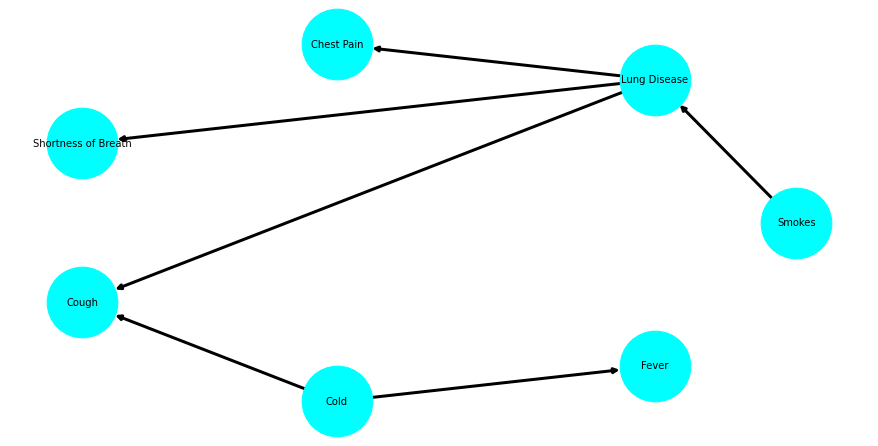

In [4]:
import networkx as nx

plt.figure(figsize=(12,6))

nx.draw(model, pos=nx.circular_layout(model), with_labels=True, node_size=5000,
        node_color='cyan', width=3, font_size=10)

plt.show()

In [5]:
cpd_smokes = TabularCPD(variable = 'Smokes',
                        variable_card = 2,
                        values = [[0.2], [0.8]],
                        state_names = {'Smokes': ['Yes', 'No']})
print(cpd_smokes)

+-------------+-----+
| Smokes(Yes) | 0.2 |
+-------------+-----+
| Smokes(No)  | 0.8 |
+-------------+-----+


In [6]:
cpd_cold = TabularCPD(variable = 'Cold',
                        variable_card = 2,
                        values = [[0.2], [0.8]],
                        state_names = {'Cold': ['Yes', 'No']})
print(cpd_cold)

+-----------+-----+
| Cold(Yes) | 0.2 |
+-----------+-----+
| Cold(No)  | 0.8 |
+-----------+-----+


In [7]:
cpd_lung_dis = TabularCPD(variable = 'Lung Disease',
                        variable_card = 2,
                        values = [[0.1009,0.001],
                                  [0.8991, 0.999]],
                        evidence= ['Smokes'],
                        evidence_card = [2],
                        state_names = {'Lung Disease': ['Yes', 'No'],
                                       'Smokes': ['Yes', 'No']})
print(cpd_lung_dis)

+-------------------+-------------+------------+
| Smokes            | Smokes(Yes) | Smokes(No) |
+-------------------+-------------+------------+
| Lung Disease(Yes) | 0.1009      | 0.001      |
+-------------------+-------------+------------+
| Lung Disease(No)  | 0.8991      | 0.999      |
+-------------------+-------------+------------+


In [8]:
cpd_short_breath = TabularCPD(variable = 'Shortness of Breath',
                        variable_card = 2,
                        values = [[0.208,0.01],
                                  [0.792, 0.99]],
                        evidence= ['Lung Disease'],
                        evidence_card = [2],
                        state_names = {'Shortness of Breath': ['Yes', 'No'],
                                       'Lung Disease': ['Yes', 'No']})
print(cpd_short_breath)

+--------------------------+-------------------+------------------+
| Lung Disease             | Lung Disease(Yes) | Lung Disease(No) |
+--------------------------+-------------------+------------------+
| Shortness of Breath(Yes) | 0.208             | 0.01             |
+--------------------------+-------------------+------------------+
| Shortness of Breath(No)  | 0.792             | 0.99             |
+--------------------------+-------------------+------------------+


In [9]:
cpd_chest_pain = TabularCPD(variable = 'Chest Pain',
                        variable_card = 2,
                        values = [[0.178,0.05],
                                  [0.822, 0.95]],
                        evidence= ['Lung Disease'],
                        evidence_card = [2],
                        state_names = {'Chest Pain': ['Yes', 'No'],
                                       'Lung Disease': ['Yes', 'No']})
print(cpd_chest_pain)

+-----------------+-------------------+------------------+
| Lung Disease    | Lung Disease(Yes) | Lung Disease(No) |
+-----------------+-------------------+------------------+
| Chest Pain(Yes) | 0.178             | 0.05             |
+-----------------+-------------------+------------------+
| Chest Pain(No)  | 0.822             | 0.95             |
+-----------------+-------------------+------------------+


In [10]:
cpd_fever = TabularCPD(variable = 'Fever',
                        variable_card = 2,
                        values = [[0.307,0.03],
                                  [0.693, 0.97]],
                        evidence= ['Cold'],
                        evidence_card = [2],
                        state_names = {'Fever': ['Yes', 'No'],
                                       'Cold': ['Yes', 'No']})
print(cpd_fever)

+------------+-----------+----------+
| Cold       | Cold(Yes) | Cold(No) |
+------------+-----------+----------+
| Fever(Yes) | 0.307     | 0.03     |
+------------+-----------+----------+
| Fever(No)  | 0.693     | 0.97     |
+------------+-----------+----------+


In [11]:
cpd_cough = TabularCPD(variable = 'Cough',
                        variable_card = 2,
                        values = [[0.7525,0.505, 0.505, 0.07],
                                  [0.2475, 0.495, 0.495, 0.93]],
                        evidence= ['Lung Disease','Cold'],
                        evidence_card = [2, 2],
                        state_names = {'Cough': ['Yes', 'No'],
                                       'Lung Disease': ['Yes', 'No'],
                                       'Cold': ['Yes', 'No']})
print(cpd_cough)

+--------------+-------------------+-----+------------------+
| Lung Disease | Lung Disease(Yes) | ... | Lung Disease(No) |
+--------------+-------------------+-----+------------------+
| Cold         | Cold(Yes)         | ... | Cold(No)         |
+--------------+-------------------+-----+------------------+
| Cough(Yes)   | 0.7525            | ... | 0.07             |
+--------------+-------------------+-----+------------------+
| Cough(No)    | 0.2475            | ... | 0.93             |
+--------------+-------------------+-----+------------------+


In [12]:
model.add_cpds(cpd_smokes,
               cpd_cold,
               cpd_lung_dis,
               cpd_short_breath,
               cpd_chest_pain,
               cpd_cough,
               cpd_fever)
model

In [13]:
model.check_model()

True

In [14]:
model.get_cpds()

[<TabularCPD representing P(Smokes:2) at 0x7f2fe6f06b50>,
 <TabularCPD representing P(Cold:2) at 0x7f2fe4a47bd0>,
 <TabularCPD representing P(Lung Disease:2 | Smokes:2) at 0x7f2fe4a52450>,
 <TabularCPD representing P(Shortness of Breath:2 | Lung Disease:2) at 0x7f2fe4a521d0>,
 <TabularCPD representing P(Chest Pain:2 | Lung Disease:2) at 0x7f2fe4ef78d0>,
 <TabularCPD representing P(Cough:2 | Lung Disease:2, Cold:2) at 0x7f2fe4ef25d0>,
 <TabularCPD representing P(Fever:2 | Cold:2) at 0x7f2fe4a47b90>]

In [15]:
model.get_independencies()

(Shortness of Breath ⟂ Cold, Fever)
(Shortness of Breath ⟂ Cold, Fever | Smokes)
(Shortness of Breath ⟂ Fever | Cold)
(Shortness of Breath ⟂ Cold | Fever)
(Shortness of Breath ⟂ Cold, Fever | Chest Pain)
(Shortness of Breath ⟂ Cough, Smokes, Cold, Fever, Chest Pain | Lung Disease)
(Shortness of Breath ⟂ Fever | Cough, Cold)
(Shortness of Breath ⟂ Cold, Fever, Chest Pain, Smokes | Cough, Lung Disease)
(Shortness of Breath ⟂ Fever | Cold, Smokes)
(Shortness of Breath ⟂ Cold | Fever, Smokes)
(Shortness of Breath ⟂ Cold, Fever | Chest Pain, Smokes)
(Shortness of Breath ⟂ Cough, Fever, Cold, Chest Pain | Lung Disease, Smokes)
(Shortness of Breath ⟂ Fever | Cold, Chest Pain)
(Shortness of Breath ⟂ Cough, Fever, Chest Pain, Smokes | Cold, Lung Disease)
(Shortness of Breath ⟂ Cold | Fever, Chest Pain)
(Shortness of Breath ⟂ Cough, Cold, Chest Pain, Smokes | Fever, Lung Disease)
(Shortness of Breath ⟂ Cough, Fever, Cold, Smokes | Chest Pain, Lung Disease)
(Shortness of Breath ⟂ Fever | Cough, C

In [16]:
model.local_independencies('Smokes')

(Smokes ⟂ Cold, Fever)

In [17]:
model.local_independencies('Lung Disease')

(Lung Disease ⟂ Cold, Fever | Smokes)

In [18]:
model.local_independencies('Shortness of Breath')

(Shortness of Breath ⟂ Cough, Smokes, Cold, Fever, Chest Pain | Lung Disease)

In [19]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

infer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
p_dist_cold = infer.query(['Cold'])

print(p_dist_cold)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+-------------+
| Cold      |   phi(Cold) |
+===========+=============+
| Cold(Yes) |      0.2000 |
+-----------+-------------+
| Cold(No)  |      0.8000 |
+-----------+-------------+


In [21]:
p_dist_lung_dis = infer.query(['Lung Disease'])

print(p_dist_lung_dis)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-------------------+---------------------+
| Lung Disease      |   phi(Lung Disease) |
+===================+=====================+
| Lung Disease(Yes) |              0.0210 |
+-------------------+---------------------+
| Lung Disease(No)  |              0.9790 |
+-------------------+---------------------+


In [22]:
p_dist_chest_pain = infer.query(['Chest Pain'])

print(p_dist_chest_pain)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-----------------+-------------------+
| Chest Pain      |   phi(Chest Pain) |
+=================+===================+
| Chest Pain(Yes) |            0.0527 |
+-----------------+-------------------+
| Chest Pain(No)  |            0.9473 |
+-----------------+-------------------+


In [23]:
p_dist_cough = infer.query(['Cough'])

print(p_dist_cough)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------------+--------------+
| Cough      |   phi(Cough) |
+============+==============+
| Cough(Yes) |       0.1653 |
+------------+--------------+
| Cough(No)  |       0.8347 |
+------------+--------------+


In [24]:
print(infer.query(['Cold', 'Cough', 'Lung Disease'], joint = True))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------------+-------------------+-----------+--------------------------------+
| Cough      | Lung Disease      | Cold      |   phi(Cough,Lung Disease,Cold) |
+============+===================+===========+================================+
| Cough(Yes) | Lung Disease(Yes) | Cold(Yes) |                         0.0032 |
+------------+-------------------+-----------+--------------------------------+
| Cough(Yes) | Lung Disease(Yes) | Cold(No)  |                         0.0085 |
+------------+-------------------+-----------+--------------------------------+
| Cough(Yes) | Lung Disease(No)  | Cold(Yes) |                         0.0989 |
+------------+-------------------+-----------+--------------------------------+
| Cough(Yes) | Lung Disease(No)  | Cold(No)  |                         0.0548 |
+------------+-------------------+-----------+--------------------------------+
| Cough(No)  | Lung Disease(Yes) | Cold(Yes) |                         0.0010 |
+------------+-------------------+------

In [25]:
print(infer.query(['Cough'], evidence = {'Cold': 'Yes'}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+------------+--------------+
| Cough      |   phi(Cough) |
+============+==============+
| Cough(Yes) |       0.5102 |
+------------+--------------+
| Cough(No)  |       0.4898 |
+------------+--------------+


In [26]:
print(infer.query(['Cough'], evidence = {'Cold': 'No'}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+------------+--------------+
| Cough      |   phi(Cough) |
+============+==============+
| Cough(Yes) |       0.0791 |
+------------+--------------+
| Cough(No)  |       0.9209 |
+------------+--------------+


In [27]:
print(infer.query(['Lung Disease'], evidence = {'Cough': 'Yes'}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-------------------+---------------------+
| Lung Disease      |   phi(Lung Disease) |
+===================+=====================+
| Lung Disease(Yes) |              0.0704 |
+-------------------+---------------------+
| Lung Disease(No)  |              0.9296 |
+-------------------+---------------------+


In [28]:
print(infer.query(['Chest Pain'], evidence = {'Smokes': 'Yes'}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------------+-------------------+
| Chest Pain      |   phi(Chest Pain) |
+=================+===================+
| Chest Pain(Yes) |            0.0629 |
+-----------------+-------------------+
| Chest Pain(No)  |            0.9371 |
+-----------------+-------------------+


## Creating Bayesian Machine Learning Models

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pgmpy

from pgmpy.models import BayesianModel, BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

from sklearn.model_selection import train_test_split

In [232]:
df = pd.read_csv('./insurance2.csv')

df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [233]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [234]:
df['age'] = pd.cut(df.age, bins=[0,30,40,np.inf], labels=[0, 1, 2])
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0,0,27.900,0,1,3,16884.92400,1
1,0,1,33.770,1,0,2,1725.55230,1
2,0,1,33.000,3,0,2,4449.46200,0
3,1,1,22.705,0,0,1,21984.47061,0
4,1,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,2,1,30.970,3,0,1,10600.54830,0
1334,0,0,31.920,0,0,0,2205.98080,1
1335,0,0,36.850,0,0,2,1629.83350,1
1336,0,0,25.800,0,0,3,2007.94500,0


In [235]:
df['age'].unique()

[0, 1, 2]
Categories (3, int64): [0 < 1 < 2]

In [236]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [237]:
df['bmi'] = pd.cut(df.bmi, bins=[0,20,40,np.inf], labels=[0, 1, 2])
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0,0,1,0,1,3,16884.92400,1
1,0,1,1,1,0,2,1725.55230,1
2,0,1,1,3,0,2,4449.46200,0
3,1,1,1,0,0,1,21984.47061,0
4,1,1,1,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,2,1,1,3,0,1,10600.54830,0
1334,0,0,1,0,0,0,2205.98080,1
1335,0,0,1,0,0,2,1629.83350,1
1336,0,0,1,0,0,3,2007.94500,0


In [238]:
df['bmi'].unique()

[1, 2, 0]
Categories (3, int64): [0 < 1 < 2]

In [239]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [240]:
df['charges'] = pd.cut(df.charges, bins=[0,3626,3626*2,np.inf], labels=[0, 1, 2])
df


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0,0,1,0,1,3,2,1
1,0,1,1,1,0,2,0,1
2,0,1,1,3,0,2,1,0
3,1,1,1,0,0,1,2,0
4,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...
1333,2,1,1,3,0,1,2,0
1334,0,0,1,0,0,0,0,1
1335,0,0,1,0,0,2,0,1
1336,0,0,1,0,0,3,0,0


In [241]:
df['charges'].unique()

[2, 0, 1]
Categories (3, int64): [0 < 1 < 2]

In [178]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,1,1,2,0,0,1,2,0
4,1,1,2,0,0,1,1,1
...,...,...,...,...,...,...,...,...
1333,2,2,0,2,2,2,0,2
1334,0,0,0,0,0,0,0,0
1335,0,0,0,0,0,0,0,0
1336,0,0,0,0,0,0,0,0


In [242]:
model = BayesianModel([('age', 'insuranceclaim'),
                       ('sex', 'insuranceclaim'),
                       ('bmi', 'insuranceclaim'),
                       ('children', 'insuranceclaim'),
                       ('smoker', 'insuranceclaim'),
                       ('smoker', 'charges'),
                       ('bmi', 'charges'),
                       ('sex', 'charges'),
                       ('region', 'insuranceclaim'),
                       ('charges', 'insuranceclaim')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [243]:
X_train, X_test = train_test_split(df, test_size=.2, random_state=42)

In [244]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
560,2,0,0,2,0,1,2,0
1285,2,0,1,0,0,0,2,0
1142,2,0,1,0,0,2,2,0
969,1,0,1,5,0,2,2,0
486,2,0,1,3,0,1,2,0


In [245]:
X_test.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
764,2,0,1,2,0,0,2,1
887,1,0,1,0,0,1,1,1
890,2,0,1,0,1,1,2,1
1293,2,1,1,3,0,1,2,1
259,0,1,1,0,1,1,2,1


In [246]:
model.get_cpds()

[]

In [247]:
model.fit(X_train)

In [248]:
model.get_cpds()

[<TabularCPD representing P(age:3) at 0x7f2fd1256210>,
 <TabularCPD representing P(insuranceclaim:2 | age:3, bmi:3, charges:3, children:6, region:4, sex:2, smoker:2) at 0x7f2fcf6af950>,
 <TabularCPD representing P(sex:2) at 0x7f2fd2067ad0>,
 <TabularCPD representing P(bmi:3) at 0x7f2fd1ffe910>,
 <TabularCPD representing P(children:6) at 0x7f2fd10756d0>,
 <TabularCPD representing P(smoker:2) at 0x7f2fd136e6d0>,
 <TabularCPD representing P(charges:3 | bmi:3, sex:2, smoker:2) at 0x7f2fcf6a1b50>,
 <TabularCPD representing P(region:4) at 0x7f2fd1441810>]

In [249]:
for edge in model.edges():
  print(edge)

('age', 'insuranceclaim')
('sex', 'insuranceclaim')
('sex', 'charges')
('bmi', 'insuranceclaim')
('bmi', 'charges')
('children', 'insuranceclaim')
('smoker', 'insuranceclaim')
('smoker', 'charges')
('charges', 'insuranceclaim')
('region', 'insuranceclaim')


In [250]:
y_test = X_test['insuranceclaim']

In [251]:
y_test.head()

764     1
887     1
890     1
1293    1
259     1
Name: insuranceclaim, dtype: int64

In [252]:
X_test = X_test.drop('insuranceclaim', axis=1)

In [253]:
X_test.head()

,age,sex,bmi,children,smoker,region,charges
764,2,0,1,2,0,0,2
887,1,0,1,0,0,1,1
890,2,0,1,0,1,1,2
1293,2,1,1,3,0,1,2
259,0,1,1,0,1,1,2


In [254]:
y_pred_bayes = model.predict(X_test)

  0%|          | 0/153 [00:00<?, ?it/s]

In [255]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_bayes)))

Model accuracy score: 0.6754


$$ F_1 = 2 * \frac{precision*recall}{precision+recall} $$

$$ precision = \frac{TP}{TP + FP} $$

$$ recall = \frac{TP}{TP + FN} $$

In [256]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('Precision score (macro): ', precision_score(y_test, y_pred_bayes, average='macro'))
print('Precision score (micro): ', precision_score(y_test, y_pred_bayes, average='micro'))
print('Precision score (weighted): ', precision_score(y_test, y_pred_bayes, average='weighted'))

print('\nRecall score (macro): ', recall_score(y_test, y_pred_bayes, average='macro'))
print('Recall score (micro): ', recall_score(y_test, y_pred_bayes, average='micro'))
print('Recall score (weighted): ', recall_score(y_test, y_pred_bayes, average='weighted'))

print('\nF1 score (macro): ', f1_score(y_test, y_pred_bayes, average='macro'))
print('F1 score (micro): ', f1_score(y_test, y_pred_bayes, average='micro'))
print('F1 score (weighted): ', f1_score(y_test, y_pred_bayes, average='weighted'))

Precision score (macro):  0.6769162210338681
Precision score (micro):  0.6753731343283582
Precision score (weighted):  0.6977478915582516

Recall score (macro):  0.6843617577059267
Recall score (micro):  0.6753731343283582
Recall score (weighted):  0.6753731343283582

F1 score (macro):  0.672523490498462
F1 score (micro):  0.6753731343283582
F1 score (weighted):  0.6786787211710378


In [258]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

ins_claim_dist = infer.query(['insuranceclaim'])

print(ins_claim_dist)  # marginal values across all insurance claims

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+-------------------+-----------------------+
| insuranceclaim    |   phi(insuranceclaim) |
+===================+=======================+
| insuranceclaim(0) |                0.4152 |
+-------------------+-----------------------+
| insuranceclaim(1) |                0.5848 |
+-------------------+-----------------------+


In [259]:
print(infer.query(['insuranceclaim'], evidence = {'smoker': 0, 'bmi': 2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-------------------+-----------------------+
| insuranceclaim    |   phi(insuranceclaim) |
+===================+=======================+
| insuranceclaim(0) |                0.4242 |
+-------------------+-----------------------+
| insuranceclaim(1) |                0.5758 |
+-------------------+-----------------------+


In [260]:
print(infer.query(['insuranceclaim'], evidence = {'smoker': 1, 'bmi': 2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-------------------+-----------------------+
| insuranceclaim    |   phi(insuranceclaim) |
+===================+=======================+
| insuranceclaim(0) |                0.4281 |
+-------------------+-----------------------+
| insuranceclaim(1) |                0.5719 |
+-------------------+-----------------------+


## Naive Bayes

- All $x$ variables are independent of one another

In [262]:
df = pd.read_csv('./insurance2.csv')
df['age'] = pd.cut(df.age, bins=[0,30,40,np.inf], labels=[0, 1, 2])
df['bmi'] = pd.cut(df.bmi, bins=[0,20,40,np.inf], labels=[0, 1, 2])
df['charges'] = pd.cut(df.charges, bins=[0,3626,3626*2,np.inf], labels=[0, 1, 2])


X_train, X_test = train_test_split(df, test_size=.2, random_state=42)

In [272]:
[x for x in df.columns]

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [273]:
from pgmpy.models import NaiveBayes

model = NaiveBayes(feature_vars = [x for x in df.columns[:7]], dependent_var='insuranceclaim')

model.fit(X_train)

In [274]:
model.get_cpds()

[<TabularCPD representing P(insuranceclaim:2) at 0x7f2fd14b4590>,
 <TabularCPD representing P(children:6 | insuranceclaim:2) at 0x7f2fd1055a10>,
 <TabularCPD representing P(age:3 | insuranceclaim:2) at 0x7f2fd15dbf90>,
 <TabularCPD representing P(sex:2 | insuranceclaim:2) at 0x7f2fd166a890>,
 <TabularCPD representing P(region:4 | insuranceclaim:2) at 0x7f2fd129bdd0>,
 <TabularCPD representing P(smoker:2 | insuranceclaim:2) at 0x7f2fd166a550>,
 <TabularCPD representing P(bmi:3 | insuranceclaim:2) at 0x7f2fd12a3fd0>,
 <TabularCPD representing P(charges:3 | insuranceclaim:2) at 0x7f2fd16760d0>]

In [275]:
for edge in model.edges():
  print(edge)

('insuranceclaim', 'children')
('insuranceclaim', 'age')
('insuranceclaim', 'sex')
('insuranceclaim', 'region')
('insuranceclaim', 'smoker')
('insuranceclaim', 'bmi')
('insuranceclaim', 'charges')


In [276]:
model.local_independencies('age_group')

(age_group ⟂ children, age, sex, region, smoker, bmi, charges | insuranceclaim)

In [278]:
model.local_independencies('insuranceclaim')  # none

In [279]:
y_test = X_test['insuranceclaim']
X_test = X_test.drop('insuranceclaim', axis=1)

In [280]:
y_pred_nb = model.predict(X_test)

  0%|          | 0/153 [00:00<?, ?it/s]

In [281]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score: 0.7164


In [283]:
# default average=binary
print('Precision score (weighted): ', precision_score(y_test, y_pred_nb))

print('Recall score (weighted): ', recall_score(y_test, y_pred_nb))

print('F1 score (weighted): ', f1_score(y_test, y_pred_nb))

Precision score (weighted):  0.7485380116959064
Recall score (weighted):  0.7950310559006211
F1 score (weighted):  0.7710843373493976


In [284]:
infer = VariableElimination(model)

ins_claim_dist = infer.query(['insuranceclaim'])

print(ins_claim_dist)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------------------+-----------------------+
| insuranceclaim    |   phi(insuranceclaim) |
+===================+=======================+
| insuranceclaim(0) |                0.4187 |
+-------------------+-----------------------+
| insuranceclaim(1) |                0.5813 |
+-------------------+-----------------------+


In [287]:
print(infer.query(['insuranceclaim'], evidence = {'smoker': 0, 'bmi': 0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------------------+-----------------------+
| insuranceclaim    |   phi(insuranceclaim) |
+===================+=======================+
| insuranceclaim(0) |                0.8086 |
+-------------------+-----------------------+
| insuranceclaim(1) |                0.1914 |
+-------------------+-----------------------+


In [286]:
print(infer.query(['insuranceclaim'], evidence = {'smoker': 1, 'bmi': 2}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------------------+-----------------------+
| insuranceclaim    |   phi(insuranceclaim) |
+===================+=======================+
| insuranceclaim(0) |                0.0234 |
+-------------------+-----------------------+
| insuranceclaim(1) |                0.9766 |
+-------------------+-----------------------+
